# Flajolet-Martin Algorithm
## Introduction
The Flajolet-Martin algorithm is a streaming algorithm that counts the number of distinct elements from an incoming stream. The following function implements finding the "bins" the algorithm uses through counting the number of trailing zeros from the binary representation of a given input.

In [34]:
from IPython.display import display, Math
def get_trailing_zeros(data):
    if data < 0:
        data *= -1
    binary = bin(data)
    count = 0
    binary = binary[::-1] #reverse
    for i in range(len(binary)):
        if(binary[i] == '0'):
            count += 1 #Count number of zeros
        else:
            return count
    return count

## Flajolet Martin
The implementation below takes in any hash function $h$, and the "**kwargs" is any extra variable the $h$ uses. In the cell below, we use the mmh3 function to and take in the seed as an argument.

In [6]:
# h is the hash function
# kwargs is arguments for the hash function
def Flajolet_Martin(h, data, **kwargs):
    curr = 0
    with open(data,'r') as file:
        for line in file:  
            for word in line.split(): # For each word in file
                hashed = h(word, **kwargs) # Hash
                zeros = get_trailing_zeros(hashed)
                if zeros > curr:
                    curr = zeros # If bin is larger than current bin, that is the max
    return 2**curr # Return estimate

Below we get 20 different trials to get an idea of what the estimate looks like. Notice that the range of values is large because the estimate is a power of 2. Therefore, the smallest "unit" of difference between the estimate is precisely by products of 2.

In [44]:
import mmh3
val = Flajolet_Martin(hash, 'shakespeare-all.txt')
display(Math(str(val)))
for i in range(20):
    val = Flajolet_Martin(mmh3.hash, 'shakespeare-all.txt', seed=i)
    display(Math(str(val)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

To add another dimension of randomness, you can click the button below to get a random integer, which will be the seed for the mmh3 function. This will then run the Flajolet-Martin algorithm to output the estimate.

In [42]:
import ipywidgets as widgets
from IPython.display import display
import random
from ipywidgets import  Layout

######################### Widget Layout ##########################
inner_layout = Layout(display='flex',
                    justify_content='center',
                    align_items='stretch',
                    border='solid',
                    width='100%')

########################### Functions Declarations ###########################
def run_FM(b):
    seed = random.randint(0, 500)
    val = Flajolet_Martin(mmh3.hash, 'shakespeare-all.txt', seed=seed)
    display(Math(str(val)))

# Links and declares the widgets used
def setup_widgets():
    # Set up button
    button = widgets.Button(description="Run with random hash function", layout=inner_layout)
    return button

######################### Widget setup ###########################
button = setup_widgets()
display(button)
button.on_click(run_FM)

Button(description='Run with random hash function', layout=Layout(align_items='stretch', border='solid', displ…

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Here is the exact answer to the input, found by using a naive counter.

In [40]:
def naive_distinct(data):
    dictionary = {}
    count = 0
    with open(data,'r') as file:
        for line in file:  
            for word in line.split(): 
                if word not in dictionary:
                    dictionary[word] = True
                    count += 1
    return count
display(Math(str(naive_distinct('shakespeare-all.txt'))))

<IPython.core.display.Math object>

## Plotting the probability of the bins
Below we plot the number of words we examine until we get a new "maximum bin". We run the Flajolet Martin algorithm 100 times with a different seed, simulating independent hash functions. Then, we plot the average count to get a new bin. We expect the plot to be close to $2^k$, where $k$ is the bin number.

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

def count_Flajolet_Martin(h, data, **kwargs): 
    curr = 0
    count = 0
    dict={}
    with open(data,'r') as file:
        for line in file:  
            for word in line.split(): 
                hashed = h(word, **kwargs)
                zeros = get_trailing_zeros(hashed)
                if zeros > curr:
                    curr = zeros
                    dict[zeros] = count # Store count
                    count = 0 # Reset count
                count += 1 # Didn't increment
    return dict

def plot_Flajolet_Martin(data, samples):
    sum_dict = {}
    count_dict = {} # Factor to divide by for each bin ("frequency")
    for i in range(samples):
        dict = count_Flajolet_Martin(mmh3.hash, 'shakespeare-all.txt', seed=i)
        for key in dict:
            if key in sum_dict:
                count_dict[key] += 1
                sum_dict[key] += dict[key] 
            else:
                count_dict[key] = 1
                sum_dict[key] = dict[key]
    for key in sum_dict:
        plt.plot(key, sum_dict[key]/(samples*count_dict[key]), 'o')

We see that because there could be "jumps" between the bins we choose (the estimate can change from, say $2^{5}$ to $2^{8}$ if an input with 8 trailing zeros is found), the graph is not very precise. However, from the order of magnitude the points are increasing, we can see  the $2^k$ shape.

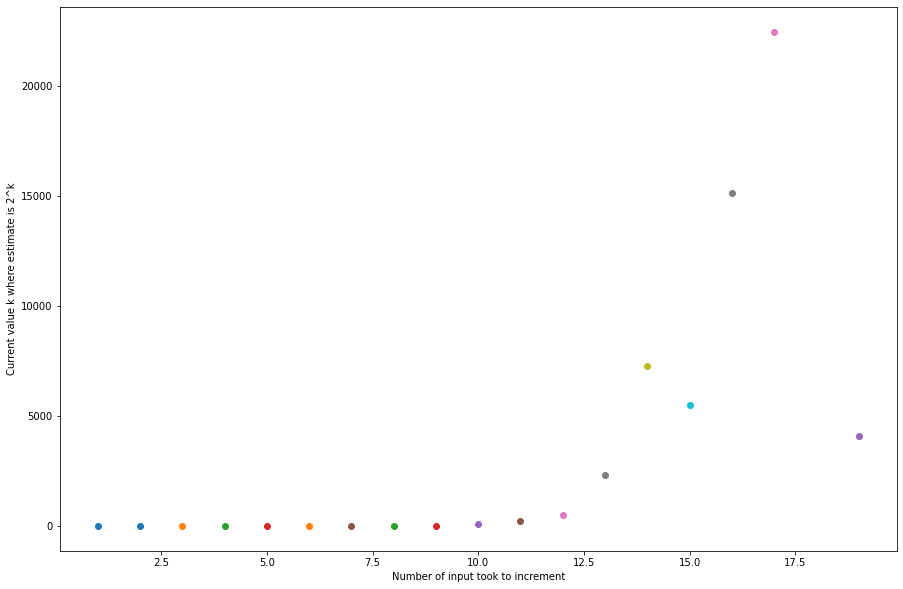

In [47]:
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Number of input took to increment")
plt.ylabel("Current value k where estimate is 2^k") 
plot_Flajolet_Martin('shakespeare-all.txt', 20)